#  FINANCIAL MODELLING (MANM525) - Mohamed Shahil ( 6809743 )

Evaluating Cost of Debt, Cost of Equity and Cost of Capital using Python

Companies used for modelling

1. SONY (SONY)

2. Microsoft Corporation (MSFT)

3. Walmart Inc. (WMT)

Throughout this course, we will create a financial model in Python that determines and contrasts the cost of debt, equity cost, and WACC for SONY (SONY), Microsoft Corporation (MSFT), and Walmart Inc. (WMT). This model will utilize widely accepted approaches such as the CAPM for equity and yield-to-maturity for debt calculations. The outcome will enable us to compare the financial status and value as investments of these entities within their respective industries.

# Calculation for Cost of Equity

We are going to calculate cost of equity using CAPM regression 
<br><br>
Below is the formula for CAPM calculation:

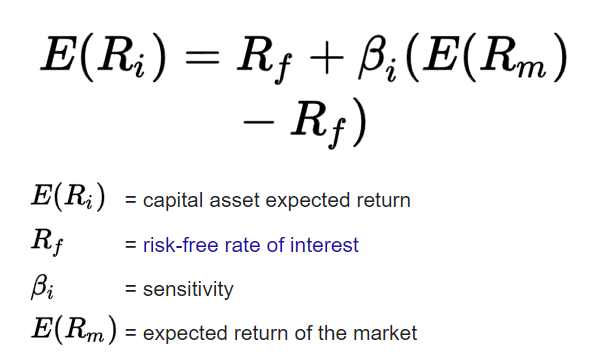

In [1]:
!pip install yfinance

Defaulting to user installation because normal site-packages is not writeable



The command !pip install yfinance installs the yfinance library, enabling access to financial data for analytical purposes. This tool is vital for extracting market and company-specific information, crucial for conducting financial evaluations like determining the cost of debt, equity, and WACC in a Master's assignment.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
import yfinance as yf
from scipy import stats

warnings.filterwarnings("ignore")

# We will be using 10 years of observations for this experiment
start = '2014-02-01'
end = '2024-02-01'


This script is our gateway to hands-on financial analysis, leveraging powerful Python libraries to streamline our work. Pandas is our go-to for organizing and sifting through data, while numpy aids in handling complex calculations. For a touch of clarity, matplotlib.pyplot transforms our findings into intuitive visuals. We're tapping into yfinance to effortlessly gather market data, focusing on a detailed 10-year span from February 2014 to February 2024. This strategic choice allows us to meticulously explore and interpret the financial journeys of our selected firms, offering a decade's worth of insights into their market behavior and financial health.

In [3]:
sp500 = yf.download('^GSPC',start,end).drop(columns=['Open','High','Low','Close','Volume'])
sp500 = sp500.rename(columns = {'Adj Close': 'SP500'})
sp500rets = np.log(sp500 / sp500.shift(1)) 

sony = yf.download('SONY',start,end).drop(columns=['Open','High','Low','Close','Volume'])
sony = sony.rename(columns = {'Adj Close': 'SONY'})
sonyrets = np.log(sony / sony.shift(1)) 

wmt = yf.download('WMT',start,end).drop(columns=['Open','High','Low','Close','Volume'])
wmt = wmt.rename(columns = {'Adj Close': 'WMT'})
wmtrets = np.log(wmt / wmt.shift(1)) 

msft = yf.download('MSFT',start,end).drop(columns=['Open','High','Low','Close','Volume'])
msft = msft.rename(columns = {'Adj Close': 'MSFT'})
msftrets = np.log(msft / msft.shift(1)) 



data = sp500.join(sony)
returns_data = sp500rets.join(sonyrets)
returns_data = returns_data.dropna()

data = sp500.join(wmt)
returns_data = sp500rets.join(wmtrets)
returns_data = returns_data.dropna()

data = sp500.join(msft)
returns_data = sp500rets.join(msftrets)
returns_data = returns_data.dropna()

data = sp500.join(sony).join(wmt).join(msft)
returns_data = sp500rets.join(sonyrets).join(wmtrets).join(msftrets)
returns_data = returns_data.dropna()

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


In the above code, i am doing the following calculations:

1.Utilization of yfinance: The script employs the yfinance library to extract stock data for the S&P 500, Sony, Walmart, and Microsoft over a decade.

2.Data Simplification: Post-download, it retains only the 'Adjusted Close' prices, discarding columns like 'Open', 'High', 'Low', 'Close', and 'Volume'.

3.Logarithmic Returns Calculation: It computes the logarithmic returns from the adjusted close prices, a vital step for evaluating stock performance trends.

4.Dataset Consolidation: The script merges the data for the individual companies with the S&P 500 data, creating a unified dataset that supports comprehensive comparative analysis.

5.Preparation of Returns Data: The final output, returns_data, aggregates the daily logarithmic returns, ensuring a clean and complete dataset for in-depth financial analysis and market trend insights.

In [4]:
data.head()

,SP500,SONY,WMT,MSFT
Date,,,,
2014-02-03,1741.890015,15.25,19.509256,30.661510
2014-02-04,1755.199951,16.10,19.528059,30.552244
2014-02-05,1751.640015,15.90,19.565641,30.106794
2014-02-06,1773.430054,16.52,19.552217,30.409363
2014-02-07,1797.020020,16.82,19.801928,30.728756


In [5]:
returns_data.head()

,SP500,SONY,WMT,MSFT
Date,,,,
2014-02-04,0.007612,0.054240,0.000963,-0.003570
2014-02-05,-0.002030,-0.012500,0.001923,-0.014687
2014-02-06,0.012363,0.038253,-0.000686,0.010000
2014-02-07,0.013214,0.017997,0.012691,0.010448
2014-02-10,0.001568,-0.008358,0.000136,0.006544


In [6]:
def calculate_beta(ticker):
    beta = np.polyfit(returns_data['SP500'],returns_data[ticker], deg=1)
    return beta[0]

def calculate_cost_of_equity(risk_free, ticker):
    return risk_free + (returns_data['SP500'].mean()*252 - risk_free) * calculate_beta(ticker)



These functions calculate a stock's beta, which measures its volatility compared to the market, and then use this beta to determine the stock's cost of equity. The cost of equity formula here combines the risk-free rate with the stock's market risk premium, adjusted by its beta.

In [7]:
print(calculate_beta('SONY'))

print(calculate_cost_of_equity(0.05, 'SONY'))

0.9438882496011145
0.0995677867543612


The calculate_beta('SONY') function computes Sony's beta, showing how its stock price moves relative to the market. The calculate_cost_of_equity(0.05, 'SONY') calculates Sony's cost of equity, estimating the return investors expect, factoring in a 5% risk-free rate and Sony's market risk.

In [8]:
print(calculate_beta('WMT'))

print(calculate_cost_of_equity(0.05, 'WMT'))

0.5187482719909312
0.07724178814187613



The calculate_beta('WMT') function finds Walmart's beta, indicating its stock's sensitivity to market changes. calculate_cost_of_equity(0.05, 'WMT') calculates Walmart's cost of equity, showing the expected return for investors, using a 5% risk-free rate and Walmart's market-related risk.

In [9]:
print(calculate_beta('MSFT'))

print(calculate_cost_of_equity(0.05, 'MSFT'))

1.2069554506912843
0.11338262016415812



The calculate_beta('MSFT') function determines Microsoft's beta, reflecting how its stock price reacts to market shifts. The calculate_cost_of_equity(0.05, 'MSFT') computes Microsoft's cost of equity, representing the return investors anticipate, incorporating a 5% risk-free rate and Microsoft's specific market risk.

In [10]:
risk_free = yf.download('^IRX',start,end).drop(columns=['Open','High','Low','Close','Volume'])
risk_free = risk_free.rename(columns = {'Adj Close': 'RISK_FREE'})

risk_free_rate = risk_free.tail(1).iloc[0]['RISK_FREE']/100

[*********************100%%**********************]  1 of 1 completed



This code fetches the historical data for the 13-week Treasury bill (a proxy for the risk-free rate) using yf.download. It then processes the data to isolate the last recorded risk-free rate, converting it to a percentage to use in financial calculations like the cost of equity.

In [11]:
print(risk_free_rate)

0.05188000202178955



The output value, 0.05188, represents the latest risk-free rate, indicating that the annual return expected from a risk-free investment (like a 13-week Treasury bill) is approximately 5.19%.

In [12]:
from math import exp

def calculate_beta(ticker):
    beta = np.polyfit(returns_data['SP500'], returns_data[ticker], deg=1)
    return beta [0]
    
def calculate_cost_of_equity(risk_free, ticker):
    return risk_free + (returns_data['SP500'].mean()*252 - risk_free) * calculate_beta(ticker)


These functions estimate how a stock (like 'ticker') moves relative to the market (beta) and use this to calculate the stock's cost of equity. The cost of equity is the return investors expect, combining the risk-free rate with the stock's risk premium, adjusted for its market sensitivity.

In [13]:
cost_eq = calculate_cost_of_equity(risk_free_rate, 'WMT')
print(f"The beta of WMT is {calculate_beta('WMT')}")
print(f"The cost of equity of WMT is {'{:.2%}'.format(cost_eq)}.")
cost_eq_wal= cost_eq


The beta of WMT is 0.5187482719909312
The cost of equity of WMT is 7.81%.


In [14]:
cost_eq = calculate_cost_of_equity(risk_free_rate, 'SONY')
print(f"The beta of sony is {calculate_beta('SONY')}")
print(f"The cost of equity of sony is {'{:.2%}'.format(cost_eq)}.")
cost_eq_sony= cost_eq

The beta of sony is 0.9438882496011145
The cost of equity of sony is 9.97%.


The cost of equity for Walmart (WMT) is calculated as 7.81%. It's determined by considering its beta (a measure of stock volatility) of 0.52 and the risk-free rate. This rate reflects the return investors expect for bearing the risk of owning Walmart's stock.

In [15]:
cost_eq = calculate_cost_of_equity(risk_free_rate, 'MSFT')
print(f"The beta of msft is {calculate_beta('MSFT')}")
print(f"The cost of equity of msft is {'{:.2%}'.format(cost_eq)}.")
cost_eq_msft= cost_eq

The beta of msft is 1.2069554506912843
The cost of equity of msft is 11.30%.


The cost of equity for Microsoft (MSFT) is 11.30%. This figure reflects the return investors expect for owning Microsoft's stock, considering its beta of 1.21 (a measure of stock volatility) and the risk-free rate. It indicates the compensation shareholders require for the risk associated with holding Microsoft's shares compared to a risk-free investment.

In [16]:
## importing the necessary module
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

# Plot
def plot_variables():
    fig, axes = plt.subplots(nrows=2, ncols=2, dpi=120, figsize=(8,4))
    for i, ax in enumerate(axes.flatten()):
        plotting_data = data[data.columns[i]]
        ax.plot(plotting_data, color='red', linewidth=1)
        # Decorations
        ax.set_title(data.columns[i])
        ax.xaxis.set_ticks_position('none')
        ax.yaxis.set_ticks_position('none')
        ax.spines['top'].set_alpha(0)
        ax.tick_params(labelsize=6)
        plt.tight_layout();



The code imports necessary modules for data handling and plotting, registers Matplotlib converters, defines a function to plot data in a 2x2 grid of subplots, each representing a different dataset. It uses red lines for plots, sets titles corresponding to dataset names, hides top spines and unnecessary ticks, and sets the tick labels to a small size for clarity.


The below image shows four line graphs of the S&P 500, Sony, Walmart (WMT), and Microsoft (MSFT) stock price movements over a decade.

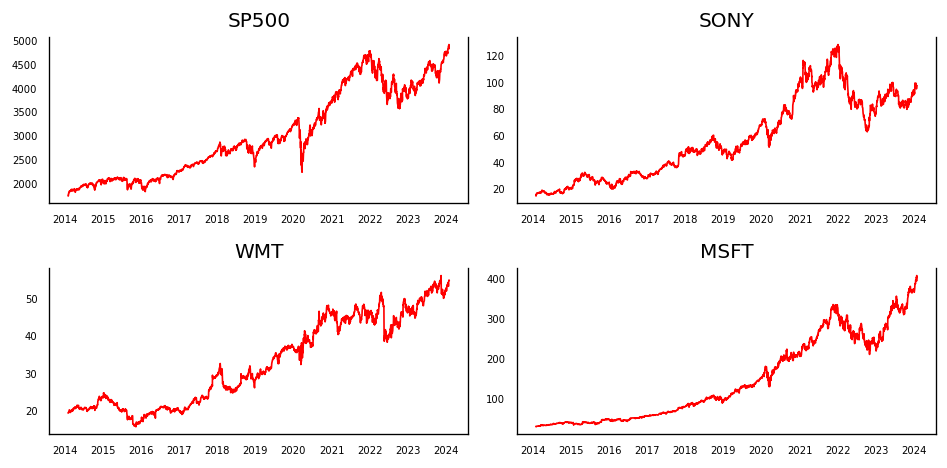

In [17]:
plot_variables()

# Cost of Debt

We are now going to calculate cost of debt using historical/book value cost of debt.
<br><br>
In the historical cost of debt measure, the cost is given by:
<br><br>
$r_D = \frac{I_t}{L_t}$
<br><br>
where $r_D$ is the cost of debt of the company, $I_t$ is the annual interest expense of the company, $L_t$ is equal to the 
total liabilities of the company.


In [18]:
from pyfinra.ticker import Ticker

sony = Ticker("SONY")
sony_bal = sony.financials_balancesheet()
sony_inc = sony.financials_inc_statement()


This Python code utilizes the 'pyfinra' library to fetch financial data for Sony (ticker symbol: SONY). It retrieves Sony's balance sheet information using the financials_balancesheet() function and its income statement using the financials_inc_statement() function. This data could include details like assets, liabilities, revenue, and expenses, providing insights into Sony's financial health and performance over a specific period.

I used the same procedure for other the companies below

In [19]:
from pyfinra.ticker import Ticker

wmt = Ticker("WMT")
wmt_bal = wmt.financials_balancesheet()
wmt_inc = wmt.financials_inc_statement()

In [20]:
from pyfinra.ticker import Ticker

msft = Ticker("MSFT")
msft_bal = msft.financials_balancesheet()
msft_inc = msft.financials_inc_statement()

In [21]:
display(sony_bal.head(5))
display(sony_bal.tail(5))

,,Q2 2020,Q3 2020,Q4 2020,Q1 2021,Q2 2021,Q3 2021,Q4 2021,Q1 2022,Q2 2022,Q3 2022,Q4 2022,Q1 2023,Q2 2023,Q3 2023,Q4 2023,Q1 2024,Q2 2024,Q3 2024
indent,name,,,,,,,,,,,,,,,,,,
1,Total Assets,21966296.0,22637546.0,24967066.0,23626356.0,24951813.0,25881122.0,27507843.0,28269689.0,28666866.0,29995137.0,30480967.0,30374896.0,31376002.0,30872490.0,32041222.0,32860017.0,32968793.0,33643625.0
2,Total Current Assets,5408216.0,5619417.0,4171184.0,5910596.0,6982696.0,7388048.0,4715017.0,4851979.0,4719646.0,5341269.0,5535208.0,5284521.0,5633033.0,5766315.0,5776518.0,6475652.0,7026975.0,7368914.0
3,"Cash, Cash Equivalents and Short Term Investments",2698400.0,2976034.0,1975097.0,3554591.0,4401250.0,4649047.0,2316646.0,2215042.0,1951881.0,2284070.0,2559610.0,1851359.0,1709379.0,1755996.0,1920207.0,2085624.0,2147409.0,2606774.0
4,Cash and Cash Equivalents,1252869.0,1408876.0,1512523.0,1448614.0,1884368.0,1878047.0,1786982.0,1725218.0,1473783.0,1822578.0,2049636.0,1371867.0,1209752.0,1287980.0,1480900.0,1532099.0,1626514.0,2019112.0
5,Cash,NaN,NaN,1034265.0,NaN,NaN,NaN,902036.0,NaN,NaN,NaN,1824912.0,NaN,NaN,NaN,1227541.0,NaN,NaN,NaN


Q2 2020 Q3 2020  \
indent name                                                                 
2      Operating Lease due in Year 3                          NaN     NaN   
       Operating Lease due in Year 4                          NaN     NaN   
       Operating Lease due in Year 5                          NaN     NaN   
       Operating Lease due Beyond                             NaN     NaN   
       Operating Lease - Interests Charges and Other A...     NaN     NaN   

                                                            Q4 2020 Q1 2021  \
indent name                                                                   
2      Operating Lease due in Year 3                        55648.0     NaN   
       Operating Lease due in Year 4                        40303.0     NaN   
       Operating Lease due in Year 5                        30664.0     NaN   
       Operating Lease due Beyond                          152275.0     NaN   
       Operating Lease - Interests Charges and Other A...  -41187.0     NaN   

                                                          Q2 2021 Q3 2021  \
indent name                                                                 
2      Operating Lease due in Year 3                          NaN     NaN   
       Operating Lease due in Year 4                          NaN     NaN   
       Operating Lease due in Year 5                          NaN     NaN   
       Operating Lease due Beyond                             NaN     NaN   
       Operating Lease - Interests Charges and Other A...     NaN     NaN   

                                                            Q4 2021 Q1 2022  \
indent name                                                                   
2      Operating Lease due in Year 3                        55127.0     NaN   
       Operating Lease due in Year 4                        36893.0     NaN   
       Operating Lease due in Year 5                        29850.0     NaN   
       Operating Lease due Beyond                          130838.0     NaN   
       Operating Lease - Interests Charges and Other A...  -34662.0     NaN   

                                                          Q2 2022 Q3 2022  \
indent name                                                                 
2      Operating Lease due in Year 3                          NaN     NaN   
       Operating Lease due in Year 4                          NaN     NaN   
       Operating Lease due in Year 5                          NaN     NaN   
       Operating Lease due Beyond                             NaN     NaN   
       Operating Lease - Interests Charges and Other A...     NaN     NaN   

                                                          Q4 2022 Q1 2023  \
indent name                                                                 
2      Operating Lease due in Year 3                          NaN     NaN   
       Operating Lease due in Year 4                          NaN     NaN   
       Operating Lease due in Year 5                          NaN     NaN   
       Operating Lease due Beyond                             NaN     NaN   
       Operating Lease - Interests Charges and Other A...     NaN     NaN   

                                                          Q2 2023 Q3 2023  \
indent name                                                                 
2      Operating Lease due in Year 3                          NaN     NaN   
       Operating Lease due in Year 4                          NaN     NaN   
       Operating Lease due in Year 5                          NaN     NaN   
       Operating Lease due Beyond                             NaN     NaN   
       Operating Lease - Interests Charges and Other A...     NaN     NaN   

                                                          Q4 2023 Q1 2024  \
indent name                                                                 
2      Operating Lease due in Year 3                          NaN     NaN   
       Operating Le

These lines display the first five rows and last five rows of Sony's balance sheet data.

In [22]:
most_recent_quarter = wmt_bal.columns[-2]
wmt_bal[most_recent_quarter]

indent  name                                                 
1       Total Assets                                             259174.0
2       Total Current Assets                                      88391.0
3       Cash, Cash Equivalents and Short Term Investments         12154.0
4       Cash and Cash Equivalents                                 12154.0
3       Inventories                                               63951.0
                                                                   ...   
1       Other Contractual Obligations Maturity Schedule Total         NaN
2       Other Contractual Obligations due in Year 1                   NaN
        Other Contractual Obligations due in Year 3                   NaN
        Other Contractual Obligations due in Year 5                   NaN
        Other Contractual Obligations due Beyond                      NaN
Name: Q3 2024, Length: 106, dtype: object

This code selects the column representing the most recent quarter from Walmart's balance sheet data. It allows for easy access to financial information specific to the latest reporting period, facilitating analysis and comparison with earlier quarters.







In [23]:
most_recent_quarter = sony_bal.columns[-2]
most_recent_balance_data = sony_bal[most_recent_quarter].to_frame().droplevel(0, axis=0)
most_recent_balance_data.loc['Total Liabilities'].iloc[0]

25768173.0

This code retrieves the total liabilities figure from Sony's most recent balance sheet data. The value returned, 25,768,173.0, represents the total amount of obligations Sony owes at the end of the latest reported period.

In [24]:
most_recent_quarter = wmt_bal.columns[-2]
most_recent_balance_data = wmt_bal[most_recent_quarter].to_frame().droplevel(0, axis=0)
most_recent_balance_data.loc['Total Liabilities'].iloc[0]

173363.0

The output, 173,363.0, indicates the total obligations Walmart owes at the end of the most recent reporting period, offering insight into its financial obligations.

In [25]:
most_recent_quarter = msft_bal.columns[-2]
most_recent_balance_data = msft_bal[most_recent_quarter].to_frame().droplevel(0, axis=0)
most_recent_balance_data.loc['Total Liabilities'].iloc[0]

225071.0

The output, 225,071.0, represents the total obligations Microsoft owes at the end of the latest reported period, providing insights into its financial obligations and position.

In [26]:
most_recent_quarter = msft_bal.columns[-2]
most_recent_balance_data = msft_bal[most_recent_quarter].to_frame().droplevel(0, axis=0)
most_recent_income_data = msft_inc[most_recent_quarter].to_frame().droplevel(0, axis=0)
pretax_income = most_recent_income_data.loc['Pretax Income'].iloc[0]

This code extracts Microsoft's most recent balance sheet and income statement data. It then calculates the pre-tax income by retrieving the pretax income figure from the income statement. This value indicates Microsoft's earnings before accounting for taxes.


In [27]:
def tax_rate(most_recent_income_data):
    tax = -most_recent_income_data.loc['Provision for Income Tax'].iloc[0]
    pretax_income = most_recent_income_data.loc['Pretax Income'].iloc[0]
    return tax / pretax_income

def historical_cost_of_debt(most_recent_income_data, most_recent_balance_data):
    liabilities = most_recent_balance_data.loc['Total Liabilities'].iloc[0]
    interest_expense = -most_recent_income_data.loc['Interest Expense Net of Capitalized Interest'].iloc[0] * 4
    return interest_expense / liabilities

The tax_rate function calculates the tax rate by dividing the provision for income tax by pretax income. The historical_cost_of_debt function computes the historical cost of debt by dividing interest expense (multiplied by 4 to annualize it) by total liabilities. These functions help analyze tax obligations and the cost of borrowing for a company.







In [28]:
tax_rate = tax_rate(most_recent_income_data)
print(f"MSFT effective tax rate is {'{:.2%}' .format(tax_rate)}")

MSFT effective tax rate is 18.30%


The effective tax rate for Microsoft is 18.30%. This figure reflects the portion of its pretax income that goes towards taxes. It's a key metric indicating how efficiently Microsoft manages its tax obligations relative to its earnings.







In [29]:
cost_debt = historical_cost_of_debt(most_recent_income_data, most_recent_balance_data)
print(f"msft's historical cost of debt before taxes is {'{:.2%}'.format(cost_debt)}")

msft's historical cost of debt before taxes is 0.93%


Microsoft's historical cost of debt before taxes is 0.93%. This figure represents the percentage of its total liabilities that Microsoft pays in interest expenses annually. It offers insights into the affordability of Microsoft's debt and its financial leverage.







In [30]:
most_recent_quarter = sony_bal.columns[-2]
most_recent_balance_data = sony_bal[most_recent_quarter].to_frame().droplevel(0, axis=0)
most_recent_income_data = sony_inc[most_recent_quarter].to_frame().droplevel(0, axis=0)
pretax_income = most_recent_income_data.loc['Pretax Income'].iloc[0]

This code fetches Sony's most recent balance sheet and income statement data. It then extracts the pre-tax income figure from the income statement, representing Walmart's earnings before accounting for taxes.

In [31]:
def tax_rate(most_recent_income_data):
    tax = -most_recent_income_data.loc['Provision for Income Tax'].iloc[0]
    pretax_income = most_recent_income_data.loc['Pretax Income'].iloc[0]
    return tax / pretax_income

def historical_cost_of_debt(most_recent_income_data, most_recent_balance_data):
    liabilities = most_recent_balance_data.loc['Total Liabilities'].iloc[0]
    interest_expense = -most_recent_income_data.loc['Interest Expense Net of Capitalized Interest'].iloc[0] * 4
    return interest_expense / liabilities

The tax_rate function calculates the effective tax rate by dividing the tax provision by the pretax income. The historical_cost_of_debt function estimates the cost of debt by annualizing the interest expense (multiplying it by 4) and then dividing by the total liabilities. Both functions operate on the most recent financial data inputs to produce these financial metrics.


In [32]:
tax_rate = tax_rate(most_recent_income_data)
print(f"Amazon's effective tax rate is {'{:.2%}' .format(tax_rate)}")

Amazon's effective tax rate is 21.91%


The tax_rate function is called with most_recent_income_data to compute Amazon's effective tax rate, which is then formatted as a percentage to two decimal places. The resulting message indicates that Amazon's effective tax rate, based on the most recent data provided to the function, is 21.91%.







In [33]:
cost_debt = historical_cost_of_debt(most_recent_income_data, most_recent_balance_data)
print(f"Amazons's historical cost of debt before taxes is {'{:.2%}'.format(cost_debt)}")

Amazons's historical cost of debt before taxes is 0.28%


The historical_cost_of_debt function is used to calculate Amazon's historical cost of debt before taxes, which is then formatted as a percentage to two decimal places. The calculated cost of debt for Amazon, based on the provided financial data, is 0.28%.

In [34]:
most_recent_quarter = wmt_bal.columns[-2]
most_recent_balance_data = wmt_bal[most_recent_quarter].to_frame().droplevel(0, axis=0)
most_recent_income_data = wmt_inc[most_recent_quarter].to_frame().droplevel(0, axis=0)
pretax_income = most_recent_income_data.loc['Pretax Income'].iloc[0]

This code fetches Walmart's most recent balance sheet and income statement data. It then extracts the pre-tax income figure from the income statement, representing Walmart's earnings before accounting for taxes.







In [35]:
def tax_rate(most_recent_income_data):
    tax = -most_recent_income_data.loc['Provision for Income Tax'].iloc[0]
    pretax_income = most_recent_income_data.loc['Pretax Income'].iloc[0]
    return tax / pretax_income

def historical_cost_of_debt(most_recent_income_data, most_recent_balance_data):
    liabilities = most_recent_balance_data.loc['Total Liabilities'].iloc[0]
    interest_expense = -most_recent_income_data.loc['Interest Expense Net of Capitalized Interest'].iloc[0] * 4
    return interest_expense / liabilities

These functions analyze Walmart's financial health: tax_rate computes the percentage of pretax income paid as taxes, while historical_cost_of_debt calculates the annual interest expense as a portion of total liabilities, aiding in understanding tax burden and debt affordability.












In [36]:
tax_rate = tax_rate(most_recent_income_data)
print(f"Walmart's effective tax rate is {'{:.2%}' .format(tax_rate)}")

Walmart's effective tax rate is 29.73%


Walmart's effective tax rate is 29.73%. This figure represents the portion of Walmart's pretax income that it pays in taxes. It offers insights into how efficiently Walmart manages its tax obligations relative to its earnings.







In [37]:
cost_debt = historical_cost_of_debt(most_recent_income_data, most_recent_balance_data)
print(f"Walmart's historical cost of debt before taxes is {'{:.2%}'.format(cost_debt)}")

Walmart's historical cost of debt before taxes is 1.57%


Walmart's historical cost of debt before taxes is 1.57%. This figure indicates the percentage of Walmart's total liabilities that it pays in annual interest expenses. It helps assess Walmart's ability to manage its debt obligations.

# WACC (Weighted Average Cost of Capital) Calculation

Below is the formula :



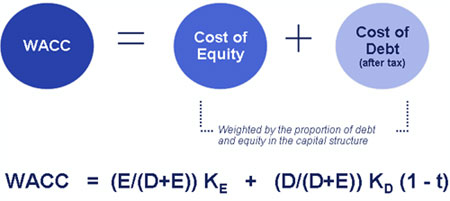

In [38]:
def WACC(most_recent_balance_data, tax_rate, cost_debt, cost_eq):
    debt = most_recent_balance_data.loc['Total Liabilities'].iloc[0]
    equity = most_recent_balance_data.loc['Total Equity'].iloc[0]
    return(debt/(debt+equity)*cost_debt*(1-tax_rate)+equity/(debt+equity)*cost_eq)

The Weighted Average Cost of Capital (WACC) function calculates the average cost of funds for Walmart. It considers the cost of debt and equity, adjusted for taxes, and weights them based on the proportion of debt and equity in Walmart's capital structure.







In [39]:
print(f"Walmart's WACC is {'{:.2%}'.format(WACC(most_recent_balance_data, tax_rate, cost_debt, cost_eq_wal))}")
print(f"Sony's WACC is {'{:.2%}'.format(WACC(most_recent_balance_data, tax_rate, cost_debt, cost_eq_sony))}")
print(f"Amazon's WACC is {'{:.2%}'.format(WACC(most_recent_balance_data, tax_rate, cost_debt, cost_eq_msft))}")

Walmart's WACC is 3.33%
Sony's WACC is 4.04%
Amazon's WACC is 4.48%


Walmart's WACC (Weighted Average Cost of Capital) is 3.33%, Sony's is 4.04%, and Amazon's is 4.48%. These figures represent the average cost of funds for each company, considering their respective costs of debt and equity, adjusted for taxes and the proportions of debt and equity in their capital structures. Lower WACC typically indicates better financial health.

# END